<a href="https://colab.research.google.com/github/skmerick/ifood/blob/main/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parte 1 - Análise Exploratória de Dados - Exercícios


--- 
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">



### Acessando as bases

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Fixa em duas casas decimais a visualização do float
pd.options.display.float_format = '{:.2f}'.format

### Segementação de clientes - `customer_segmentation`

In [ ]:
pasta_raiz = '/content/drive/MyDrive/datasets/ifood'

In [ ]:
df_customer_segmentation = pd.read_csv(f'{pasta_raiz}/df_customer_segmentation.csv', sep=';')

In [ ]:
df_customer_segmentation.head(2)

,customer_id,segmentation_month,ifood_status_last_month,ifood_status,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,last_valid_order_date,qtt_invalid_orders,last_invalid_order_date,marlin_tag,recency_months,last_nps,registration_date,customer_lifetime_days,customer_lifetime_months,top_3_merchants_code,was_mub_last_month,buyer_last_91d,top_city,top_district,top_centroid_id,first_order_date,last_order_date,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,recency_days_bucket,recency_days_bucket_description,freq_last_91d,freq_last_91d_bucket,freq_last_91d_bucket_description,avg_aov_last_91d,maturity_orders,maturity_orders_bucket,maturity_orders_bucket_description,benefits_sensitivity,benefits_sensitivity_bucket,preferred_shift_bucket,preferred_shift_bucket_description,merchant_variety,merchant_variety_bucket,merchant_offer,merchant_offer_bucket,merchant_offer_bucket_description,top_dish_bucket,top_dish_bucket_description,preferred_dishes,preferred_dishes_code
0,6677d5e78e4627cf80ae3ea3281869183c946c366efc43...,2019-10-01,Inactive,Inactive,9.00,32,49,2019-07-30,1,2019-02-18,4. Retention Carp,3.06,Promoter,2018-03-20T18:39:45.094Z,591,19,"[\\d3e994ac-c883-4d00-a38f-4d7b86926c18\\\,\\\...",0,0,SAO PAULO,Jardim Europa,-23.58-46.68,2018-03-20,2019-07-30,12.22,12.22,4.00,94.00,5.00,5. > 91d,2.97,3.00,3. 2-4,65.79,49.00,4.00,4. 10-49,0.89,Alta,5,5. Jantar,0.33,Media,5515.00,5,5. > 500,2,2. Tem Cozinha Preferida,"[\\Pizza\\\,\\\""Comida Chinesa\\\""]\""""","[\\CHI\\\,\\\""PIZ\\\""]\"""""
1,5e57de756833068ca492f110539c987964b9d0e57219e2...,2019-07-01,Active,Active,15.00,28,39,2019-07-27,0,NaN,1. Marlin,0.10,Promoter,2016-04-07T17:50:02.000Z,1209,39,"[\\d8b01e5b-8ce2-437f-aacc-89f998d14656\\\,\\\...",1,1,RIO DE JANEIRO,Cordovil,-22.83-43.3,2016-04-07,2019-07-27,6.47,6.47,3.00,3.00,1.00,1. < 7d,4.95,4.00,4. 4-10,63.85,39.00,4.00,4. 10-49,0.40,Media,5,5. Jantar,0.67,Alta,1062.00,5,5. > 500,3,3. Mais de uma Cozinha Preferida,"[\\Comida Variada\\\,\\\""Comida Brasileira\\\""...","[\\BRA\\\,\\\""LCH\\\"",\\\""VAR\\\""]\"""""


**<span style="color:blue">(0.5 ponto)</span> `Q1` Quantas linhas e colunas existem no conjunto de dados?**

In [ ]:
df_customer_segmentation.shape
print('linhas:', df_customer_segmentation.shape[0])
print('colunas:', df_customer_segmentation.shape[1])

linhas: 210364
colunas: 50


Existem 210364 linhas e 50 colunas.

**<span style="color:blue">(0.5 ponto)</span> `Q2` Quantos clientes únicos existem?**

In [ ]:
print('clientes unicos:', len(df_customer_segmentation.customer_id.unique()))


clientes unicos: 30079


Existem 30079 clientes unicos.

**<span style="color:blue">(1 ponto)</span> `Q3` Quais são os 10 clientes que mais tiveram pedidos validos?**

In [ ]:
(
    df_customer_segmentation
    .groupby('customer_id')
    .agg(total_qtt_valid_orders = ('qtt_valid_orders', 'max'))
    .nlargest(10, 'total_qtt_valid_orders')
)


,total_qtt_valid_orders
customer_id,
a46bb1905790aa86717354934e2b4015c4ae157ed5b08c0a433e940547733c68,1297
9f1a9d1636dff802b65c687d37583c88f263b239ff889273b08b67f6340c6877,1200
27b0b3fbf967199f757bf36f5376b20d63c6f0ad8da241755610664cf9d7125e,1171
f1c5397923a646872f8385f296f9e0b66e2b0f095dcb53da7e939f0e8fc28f5a,1110
c932ef421caf7076a16cb7472d4fddee9a403a304d3b1ec7100c5c32d1719140,1046
29efe6f1697579b147d7bc37c6ae2a3ebdc90546a5c926f84652c0a0e1554d88,950
902ea307b3bcc41cf6d75162ed01d91516542ece0839f9326faff5f5b5fd2435,936
907404f63c230df86415085b09a45956fba84b973acbed6103995d6afdf0d8c3,928
188eaac6edd1ee23f112f99c04c3c3542a56a140ea0b13351028701ff8de6116,926


**<span style="color:blue">(1 ponto)</span> `Q4` Qual é o id do cliente mais antigo na plataforma? Existe apenas 1?**

In [ ]:
(
    df_customer_segmentation
    .groupby('customer_id')
    .agg(
        data_registration_date = ('registration_date', 'first')
        )
    .sort_values('data_registration_date').head(2)
    .reset_index()
    ).customer_id.to_list()

['07ed1b37689de6ea41fe8ca7a42129830593633ef0d058df720522b575316aea',
 '68180a00c9b111d93b9c7095fd545a187d871877d01080d506f7451594963918']

Existem 2 clientes antigos.

**<span style="color:blue">(1 ponto)</span> `Q5` Quais são os três meses que contém mais clientes `Inactive`?** Utilize a coluna `segmentation_month`.

In [ ]:
( 
    df_customer_segmentation
    .query('ifood_status == "Inactive"')
    .groupby('segmentation_month')[['customer_id']].count()
    .nlargest(3, 'customer_id')
)

,customer_id
segmentation_month,
2019-10-01,13309
2019-12-01,10414
2019-11-01,10202


**<span style="color:blue">(3 pontos)</span> `Q6` Quais são os 5 pratos mais preferidos do cliente do tipo Marlin?**

Será necessário criar uma função chamada `recuperar_preferred_dishes` para recuperar corretamente os dados. Essa função deve retornar uma lista com os pratos preferidos.

ATENÇÃO - Considere um único tipo de prato por cliente, por exemplo, o cliente com id 1a2b3c4d5e tem 6 vezes comida brasileira, deverá ser considerado como apenas 1.

In [ ]:
df_customer_segmentation.marlin_tag.unique()

array(['4. Retention Carp', '1. Marlin', '2. Tilapia', '3. Subsidy Carp',
       nan], dtype=object)

In [ ]:
def recuperar_preferred_dishes(pratos):
    aux = pratos.replace('[', '').replace(']', '').replace('\\', '').replace('"', '').replace("'", '')
    return aux.split(',')

Testando a função

In [ ]:
df_customer_segmentation.loc[0, 'preferred_dishes']

'[\\\\Pizza\\\\\\,\\\\\\"Comida Chinesa\\\\\\"]\\""'

In [ ]:
recuperar_preferred_dishes(df_customer_segmentation.loc[0, 'preferred_dishes'])

['Pizza', 'Comida Chinesa']

In [ ]:
(
    df_customer_segmentation
    .query("marlin_tag == '1. Marlin'")
    .filter(['customer_id', 'marlin_tag', 'preferred_dishes'])
    .assign(pratos = lambda df_em_memoria: df_em_memoria.preferred_dishes.apply(recuperar_preferred_dishes))
    .explode('pratos')
    .groupby(['customer_id', 'pratos']).agg(total_pratos_por_cliente = ('pratos', 'count'))
    .reset_index()
    .value_counts('pratos')
).head(5)

pratos
Lanches              10996
Pizza                 8873
Comida Brasileira     7848
Comida Japonesa       4278
Comida Saudável       2239
dtype: int64

### Pedidos - `orders`

In [ ]:
df_orders = pd.read_csv(f'{pasta_raiz}/df_orders.csv', sep=',')

In [ ]:
df_orders.head(2)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,scheduled_creation_date_local,device_app_version,device_type,device_platform,payment_method,customer_state_label,customer_city,customer_district,customer_centroid_id,customer_has_plus,customer_seg_status_last_month,customer_seg_recency_bucket,customer_seg_frequency_bucket,customer_seg_merchant_offer_bucket,customer_seg_benefits_sensitivity_bucket,customer_seg_marlin_tag,customer_seg_gross_income_bucket,customer_seg_preferred_shift,frn_id,merchant_city,merchant_district,merchant_centroid_id,merchant_dish_type,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.00,24.90,DELIVERY,False,2019-12-11T13:22:06.497Z,9.29.1,MOBILE,ANDROID,CC_ONLINE,RN,PARNAMIRIM,NOVA PARNAMIRIM,-5.89-35.2,False,Active,1.00,5.00,5.00,Alta,NaN,6.00,NaN,43583,NATAL,PONTA NEGRA,-5.87-35.18,Comida Brasileira,2722.60,0.00,2.00,0.00,2.00,1.00,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.90,50.40,DELIVERY,False,2019-11-06T17:57:17.967Z,webapp_6.2.0,SITE,DESKTOP,CC_ONLINE,PR,LONDRINA,Gleba Fazenda Palhano,-23.33-51.19,False,Active,1.00,4.00,5.00,Media,1. Marlin,6.00,NaN,533415,LONDRINA,Gleba Fazenda Palhano,-23.34-51.19,Lanches,1108.82,1.00,0.00,1.00,7.00,1.00,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...


**<span style="color:blue">(2 pontos)</span> `Q7` Quais os três bairros de São Paulo, onde o iFood mais vende pratos do tipo de Pizza?**

Lembre-se de padronizar em minusculo ou maisculo a cidade, os bairros e os tipos de pratos. Utilize o DataFrame abaixo: `df_orders_exe7`.

In [ ]:
df_orders_exe7 = df_orders[['customer_city', 'customer_district', 'merchant_dish_type']].copy()
df_orders_exe7.customer_city = df_orders_exe7.customer_city.str.lower()
df_orders_exe7.customer_district = df_orders_exe7.customer_district.str.lower()
df_orders_exe7.merchant_dish_type = df_orders_exe7.merchant_dish_type.str.lower()

In [ ]:
(
    df_orders_exe7
    .query('customer_city == "sao paulo" & merchant_dish_type == "pizza"')
    .value_counts('customer_district')
)[:3]

customer_district
bela vista      590
perdizes        424
vila mariana    343
dtype: int64

**<span style="color:blue">(1 ponto)</span> `Q8` Qual é o período do dia em que os pedidos são enviados com mais frequencia?**

Considere o período sendo dinner, lunch, snack, dawn ou breakfast. Não importa se for dia de semana ou final de semana. Por exemplo: weekend dinner e weekday dinner devem ser considerados como dinner.

In [ ]:
df_orders['order_shift'].str.split(' ').str[-1].value_counts()

dinner       299501
lunch        151659
snack         27212
dawn          12117
breakfast      1649
Name: order_shift, dtype: int64

**<span style="color:blue">(1 pontos)</span> `Q9` Qual é a média de gastos, total de gastos e total de pedidos que os usuários das plataformas Android e iOS tiveram?**

In [ ]:
(
        df_orders[df_orders.device_platform.isin(('ANDROID', 'IOS'))]
    .groupby('device_platform')
    .agg(
        media_gastos = ('paid_amount', 'mean'),
        total_gastos = ('paid_amount', 'sum'),
        total_pedidos = ('paid_amount', 'count'),
    )
    .reset_index()
)

,device_platform,media_gastos,total_gastos,total_pedidos
0,ANDROID,46.20,12695977.01,274822
1,IOS,55.55,11523010.28,207432


**<span style="color:blue">(3 pontos)</span> `Q10` Quais foram os 10 pedidos que mais demoraram para serem entregues?** Utilize as variáveis `order_timestamp_local` e `last_status_date_local`.

Lembre-se de converter as datas e horários corretamente.

In [ ]:
df_orders.order_timestamp_local = pd.to_datetime(df_orders.order_timestamp_local)
df_orders.last_status_date_local = pd.to_datetime(df_orders.last_status_date_local)

In [ ]:
(
    df_orders
    .filter(['order_id', 'order_timestamp_local', 'last_status_date_local'])
    .assign(tempo_entrega = df_orders.last_status_date_local - df_orders.order_timestamp_local)
    .sort_values('tempo_entrega', ascending=False)
)

,order_id,order_timestamp_local,last_status_date_local,tempo_entrega
419905,e99cc089-2996-4769-93e8-3faaa773e5e5,2019-09-02 07:00:51.387000+00:00,2019-09-03 11:40:03.458000+00:00,1 days 04:39:12.071000
245187,a953e18c-00ac-4e3e-acc5-24e910095862,2019-09-02 07:10:18.296000+00:00,2019-09-03 11:40:03.517000+00:00,1 days 04:29:45.221000
145073,aef131c0-e810-4c5e-b84e-9ce4a0220cfe,2019-12-25 08:25:24.789000+00:00,2019-12-26 12:36:40.753000+00:00,1 days 04:11:15.964000
290345,5f489897-9ad1-4eff-831f-3617ee7d7c8a,2019-12-25 08:55:16.099000+00:00,2019-12-26 12:37:06.097000+00:00,1 days 03:41:49.998000
177797,77aa64d0-2a12-4a71-a839-e54c5365cf8f,2019-09-02 08:28:45.219000+00:00,2019-09-03 11:40:15.497000+00:00,1 days 03:11:30.278000
...,...,...,...,...
278674,34ef4842-6b27-41eb-8b75-10e2c720c45a,2019-06-11 12:40:00+00:00,2019-06-11 11:55:02.483000+00:00,-1 days +23:15:02.483000
193863,83194aae-f6a7-4e3d-b148-870f52a6a980,2019-06-28 12:40:00+00:00,2019-06-28 11:53:56.720000+00:00,-1 days +23:13:56.720000
14036,5c18ffa2-d0e6-46e0-b8e2-a0f1886a016f,2019-06-14 12:40:00+00:00,2019-06-14 11:53:34.185000+00:00,-1 days +23:13:34.185000
208939,819a2459-e4f0-4bec-a438-43bde38a7513,2019-06-12 12:40:00+00:00,2019-06-12 11:53:28.799000+00:00,-1 days +23:13:28.799000


**<span style="color:blue">(3 pontos)</span> `Q11` Quais foram os valores minimo, máximo e médio gasto por todos os clientes durante os meses disponíveis na base?**

Utilize a variável `order_timestamp_local` para recuperar o mês.

Utilize a variável `order_total`para computar as estatísticas básicas para cada mês.

É obrigatório o uso do `groupby`.

In [ ]:
(
    df_orders
    .assign(meses = df_orders.order_timestamp_local.dt.to_period('M'))
    .groupby('meses')
    .agg(
        min_order_total = ('order_total', 'min'),
        mean_order_total = ('order_total', 'mean'),
        max_order_total = ('order_total', 'max')
    )
)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,min_order_total,mean_order_total,max_order_total
meses,,,
2019-06,13.05,55.43,609.10
2019-07,13.50,54.82,603.60
2019-08,13.00,55.77,1058.00
2019-09,16.50,55.62,759.50
2019-10,15.00,55.43,807.30
2019-11,13.79,56.10,667.70
2019-12,14.00,57.76,1641.00


### Sessões das visitas realizadas - `sessions_visits`


In [ ]:
df_session_visits = pd.read_csv(f'{pasta_raiz}/df_sessions_visits.csv', sep=',')

In [ ]:
df_session_visits.head(2)

,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network
0,41162808-5335-4e4f-aa52-45754ec1d558,2019-11-04_661ead80-50a2-48b4-ae78-f872e2f08c11,IOS,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,ca438b60-3d04-44c0-9883-c4f01fc512ad,2019-11-04T09:14:47.566Z,2019-11-04T09:15:50.323Z,2019-11-04T11:14:47.566Z,2019-11-04T11:15:50.323Z,63.00,"iPhone9,3",Apple,1.00,nan,1.00,1.00,1.00,1.00,1.00,Loop,NaN
1,52f0a543-fcc7-4ff0-bed1-41bec8a51374,2019-12-07_17ae6c54-37e1-42e3-b82b-e562aaeb7730,IOS,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,414f1e51-e872-42ca-ad5e-c30b085bd5e4,2019-12-07T13:28:37.764Z,2019-12-07T15:04:00.819Z,2019-12-07T15:28:37.764Z,2019-12-07T17:04:00.819Z,5723.00,"iPhone9,3",Apple,17.00,12.00,3.00,1.00,2.00,1.00,1.00,Last Restaurants,NaN


**<span style="color:blue">(3 pontos)</span> `Q12` Realize o passo a passo abaixo:**

* Faça concatenação das variáveis `user_identifier` e `session_id`, nesta ordem, para criar um novo identidicador único, chamado `unique_id`

* Insira a coluna `unique_id` na posição 0 do DataFrame `df_session_visits`. Utilize uma variável auxiliar para facilitar.

* Crie uma nova coluna com a diferença entre as variáveis `session_started_at_utc0` e `session_ended_at_utc0`. O nome da coluna deve ser `tempo_sessao`.

* Crie uma função que irá receber dois parâmetros, uma DataFrame e outra a quantidade de usuário mais ativos dentro da plataforma.

O objetivo dessa função é verificar os n usuários que ficaram mais tempo dentro da plataforma. NÃO precisa fazer a agregação, considere cada linha um usuário único.

**O retorno dessa função deve ser um DataFrame que irá conter todas as colunas filtradas para os n usuários mais ativos, incluindo as duas novas colunas criadas anteriormente (`unique_id` e `tempo_sessao`)**

Teste a função com os seguintes comandos:

    recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=0)
    recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=10)

**Lembre-se de tratar possíveis erros**

* Por fim, copie e cole o seguinte comando na última célula do exercício.

        df_final = recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=1000)

In [ ]:
df_session_visits['user_identifier'].fillna('', inplace=True)
df_aux = df_session_visits['user_identifier'] + df_session_visits['session_id']
df_session_visits.insert(0, 'unique_id', df_aux)
df_session_visits.head(5)
#Concatenacao das variaveis
#Coluna criada na posição 0.

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network
0,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,41162808-5335-4e4f-aa52-45754ec1d558,2019-11-04_661ead80-50a2-48b4-ae78-f872e2f08c11,IOS,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,ca438b60-3d04-44c0-9883-c4f01fc512ad,2019-11-04T09:14:47.566Z,2019-11-04T09:15:50.323Z,2019-11-04T11:14:47.566Z,2019-11-04T11:15:50.323Z,63.00,"iPhone9,3",Apple,1.00,nan,1.00,1.00,1.00,1.00,1.00,Loop,NaN
1,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,52f0a543-fcc7-4ff0-bed1-41bec8a51374,2019-12-07_17ae6c54-37e1-42e3-b82b-e562aaeb7730,IOS,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,414f1e51-e872-42ca-ad5e-c30b085bd5e4,2019-12-07T13:28:37.764Z,2019-12-07T15:04:00.819Z,2019-12-07T15:28:37.764Z,2019-12-07T17:04:00.819Z,5723.00,"iPhone9,3",Apple,17.00,12.00,3.00,1.00,2.00,1.00,1.00,Last Restaurants,NaN
2,e7dcbc11f83b22ea57ec8b385b9fa38d48532b180e3d19...,f06f2a6d-14cc-44e3-8ec6-66191659430b,2019-12-29_d8a7f51d-4394-3c9a-ae62-8522f5885d3f,ANDROID,e7dcbc11f83b22ea57ec8b385b9fa38d48532b180e3d19...,5c697207-d8a4-460e-b171-3e94e42be5ab,2019-12-29T19:58:38.297Z,2019-12-29T20:17:45.199Z,2019-12-29T22:58:38.297Z,2019-12-29T23:17:45.199Z,1147.00,Redmi Note 8,Xiaomi,2.00,4.00,7.00,7.00,5.00,1.00,1.00,Ranking,NaN
3,2959b13e1caef84fa6cde74693ba2476f17eaa72b66dad...,716d0044-0d76-4199-86ca-62930a751d59,2019-12-03_9675dcd9-9dd5-3ec3-809e-9006b4fac160,ANDROID,2959b13e1caef84fa6cde74693ba2476f17eaa72b66dad...,615b2fb5-e76d-4fa7-b982-9564650c76c5,2019-12-03T14:54:14.621Z,2019-12-03T16:31:47.527Z,2019-12-03T16:54:14.621Z,2019-12-03T18:31:47.527Z,5853.00,SM-A520F,samsung,11.00,1.00,1.00,1.00,3.00,1.00,1.00,Taxa na faixa,NaN
4,9c944018e8b8cd2ac2fec6edf1f46c3c452c4e70c46e39...,96081494-8554-4c3f-92b6-94e2070d1660,2019-12-20_e953c804-ecd2-3f00-8465-0ba2d8ce5aa1,ANDROID,9c944018e8b8cd2ac2fec6edf1f46c3c452c4e70c46e39...,ba8596c4-9fbf-4f67-9e2a-dbb65f4b7c40,2019-12-20T20:28:22.584Z,2019-12-20T20:54:25.376Z,2019-12-20T23:28:22.584Z,2019-12-20T23:54:25.376Z,1563.00,SM-J710MN,samsung,4.00,4.00,9.00,2.00,2.00,1.00,1.00,CRM Restaurant,NaN


In [ ]:
df_session_visits.session_started_at_utc0 = pd.to_datetime(df_session_visits.session_started_at_utc0)
df_session_visits.session_ended_at_utc0 = pd.to_datetime(df_session_visits.session_ended_at_utc0)
df_session_visits['tempo_sessao'] = df_session_visits.session_ended_at_utc0 - df_session_visits.session_started_at_utc0
df_session_visits
#Criando varial tempo_sessao

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao
0,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,41162808-5335-4e4f-aa52-45754ec1d558,2019-11-04_661ead80-50a2-48b4-ae78-f872e2f08c11,IOS,ffa840ebe8b397e995245525ec98f0b31a882c4d3e47dc...,ca438b60-3d04-44c0-9883-c4f01fc512ad,2019-11-04T09:14:47.566Z,2019-11-04T09:15:50.323Z,2019-11-04 11:14:47.566000+00:00,2019-11-04 11:15:50.323000+00:00,63.00,"iPhone9,3",Apple,1.00,nan,1.00,1.00,1.00,1.00,1.00,Loop,NaN,0 days 00:01:02.757000
1,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,52f0a543-fcc7-4ff0-bed1-41bec8a51374,2019-12-07_17ae6c54-37e1-42e3-b82b-e562aaeb7730,IOS,a59ea42fbbaf0fa9a48b65f45842d9d061d23775ad2af6...,414f1e51-e872-42ca-ad5e-c30b085bd5e4,2019-12-07T13:28:37.764Z,2019-12-07T15:04:00.819Z,2019-12-07 15:28:37.764000+00:00,2019-12-07 17:04:00.819000+00:00,5723.00,"iPhone9,3",Apple,17.00,12.00,3.00,1.00,2.00,1.00,1.00,Last Restaurants,NaN,0 days 01:35:23.055000
2,e7dcbc11f83b22ea57ec8b385b9fa38d48532b180e3d19...,f06f2a6d-14cc-44e3-8ec6-66191659430b,2019-12-29_d8a7f51d-4394-3c9a-ae62-8522f5885d3f,ANDROID,e7dcbc11f83b22ea57ec8b385b9fa38d48532b180e3d19...,5c697207-d8a4-460e-b171-3e94e42be5ab,2019-12-29T19:58:38.297Z,2019-12-29T20:17:45.199Z,2019-12-29 22:58:38.297000+00:00,2019-12-29 23:17:45.199000+00:00,1147.00,Redmi Note 8,Xiaomi,2.00,4.00,7.00,7.00,5.00,1.00,1.00,Ranking,NaN,0 days 00:19:06.902000
3,2959b13e1caef84fa6cde74693ba2476f17eaa72b66dad...,716d0044-0d76-4199-86ca-62930a751d59,2019-12-03_9675dcd9-9dd5-3ec3-809e-9006b4fac160,ANDROID,2959b13e1caef84fa6cde74693ba2476f17eaa72b66dad...,615b2fb5-e76d-4fa7-b982-9564650c76c5,2019-12-03T14:54:14.621Z,2019-12-03T16:31:47.527Z,2019-12-03 16:54:14.621000+00:00,2019-12-03 18:31:47.527000+00:00,5853.00,SM-A520F,samsung,11.00,1.00,1.00,1.00,3.00,1.00,1.00,Taxa na faixa,NaN,0 days 01:37:32.906000
4,9c944018e8b8cd2ac2fec6edf1f46c3c452c4e70c46e39...,96081494-8554-4c3f-92b6-94e2070d1660,2019-12-20_e953c804-ecd2-3f00-8465-0ba2d8ce5aa1,ANDROID,9c944018e8b8cd2ac2fec6edf1f46c3c452c4e70c46e39...,ba8596c4-9fbf-4f67-9e2a-dbb65f4b7c40,2019-12-20T20:28:22.584Z,2019-12-20T20:54:25.376Z,2019-12-20 23:28:22.584000+00:00,2019-12-20 23:54:25.376000+00:00,1563.00,SM-J710MN,samsung,4.00,4.00,9.00,2.00,2.00,1.00,1.00,CRM Restaurant,NaN,0 days 00:26:02.792000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463615,0c3195c85a1ece02cc06ef30d09beb2a69109a39457f16...,5099516b-0b36-499d-83ff-3cd5ada72001,2019-12-13_85f8a4fc-8078-4b7b-93b7-232bbfb3e98e,IOS,0c3195c85a1ece02cc06ef30d09beb2a69109a39457f16...,d1848636-2218-4c00-8f41-30e413192fa8,2019-12-13T21:58:41.913Z,2019-12-13T22:19:24.419Z,2019-12-14 00:58:41.913000+00:00,2019-12-14 01:19:24.419000+00:00,1243.00,"iPhone10,4",Apple,3.00,7.00,3.00,2.00,1.00,1.00,1.00,Ranking,NaN,0 days 00:20:42.506000
463616,895a07fa1934c03bef7bc4238109bf484f615838b7b336...,66f47559-3b0c-4cf0-88bc-0a296ca4443c,2019-09-01_c233d0de-4ed6-4aba-86fd-3bcd0bb98c19,ANDROID,895a07fa1934c03bef7bc4238109bf484f615838b7b336...,2142539e-34f6-4e1a-b14b-40f8cd6e656e,2019-09-01T13:33:10.010Z,2019-09-01T13:33:50.050Z,2019-09-01 16:33:10.010000+00:00,2019-09-01 16:33:50.050000+00:00,40.00,moto g(7) play,motorola,1.00,1.00,2.00,2.00,1.00,1.00,1.00,Featured Restaurant,NaN,0 days 00:00:40.040000
463617,acfd0466-3dc3-48e3-8b8a-b272e23d9151,acfd0466-3dc3-48e3-8b8a-b272e23d9151,2019-07-11_7056333d-fd05-4e03-8cdd-ac235e2f6917,IOS,,NaN,2019-07-11T18:53:45.979Z,2019-07-11T19:05:36.515Z,2019-07-11 21:53:45.979000+00:00,2019-07-11 22:05:36.515000+00:00,711.00,"iPhone9,4",Apple,3.00,13.00,3.00,2.00,1.00,1.00,1.00,Taxa Na Faixa,NaN,0 days 00:

In [ ]:
def recuperar_n_mais_usuarios_ativos(df_session, n_mais_usuarios=10):
    return(df_session.sort_values('tempo_sessao', ascending=False).head(n_mais_usuarios))

In [ ]:
# Teste com o seguinte comando:
recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=0)

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao


In [ ]:
# Teste com o seguinte comando:
recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=3)

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.00,Moto G (5S) Plus,motorola,1.00,3.00,2.00,1.00,1.00,1.00,1.00,Ranking,googleadwords_int,29 days 19:29:10.537000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.00,Redmi 7,Xiaomi,13.00,2.00,2.00,2.00,10.00,4.00,1.00,super categories bebidas,Facebook Ads,27 days 23:27:07.222000
137922,741e8ab0-47ab-49e0-b00a-135d80d6614f176e1dd5-d...,176e1dd5-d9a1-4508-a7a3-b95cbaa6eeeb,2019-06-01_f395407f-0eda-4fa6-b8bc-b5510dab53d3,IOS,741e8ab0-47ab-49e0-b00a-135d80d6614f,741e8ab0-47ab-49e0-b00a-135d80d6614f,2019-06-01T18:41:12.152Z,2019-06-29T17:33:05.611Z,2019-06-01 21:41:12.152000+00:00,2019-06-29 20:33:05.611000+00:00,2415113.00,"iPhone9,4",Apple,6.00,1.00,3.00,1.00,1.00,1.00,1.00,Featured Restaurant,googleadwords_int,27 days 22:51:53.459000


In [ ]:
# df_final poderá utilizado no próximo exercício.
df_final = recuperar_n_mais_usuarios_ativos(df_session=df_session_visits, n_mais_usuarios=1000)
df_final.head(2)

,unique_id,session_id,dau,platform,user_identifier,user_account_uuid,session_started_at_amsp,session_ended_at_amsp,session_started_at_utc0,session_ended_at_utc0,session_duration_seconds,device_model,device_manufacturer,sum_event_open,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,order_session_quantity,first_order_origin_feature,media_network,tempo_sessao
351470,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,3b42a14d-b19b-40fe-9b0b-e0dbc4689197,2019-10-17_9f643ee2-35b0-3d16-a71c-c403417f77b2,ANDROID,503d295dbeef80d0169bc59bd4ea87f9f9a7689b9cb4b3...,f9bc0483-155a-4ebf-83f1-fe6271e80517,2019-10-17T15:09:21.865Z,2019-11-16T11:38:32.402Z,2019-10-17 18:09:21.865000+00:00,2019-11-16 13:38:32.402000+00:00,2575751.00,Moto G (5S) Plus,motorola,1.00,3.00,2.00,1.00,1.00,1.00,1.00,Ranking,googleadwords_int,29 days 19:29:10.537000
350512,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2d10f2ac-7883-42aa-8d30-d9c4c548cdca,2019-09-01_2305c8c3-3784-386f-8960-6a129ca1716d,ANDROID,de14cef1f693ed124d1ac58b38a88ebe835b7dd1752cf2...,2018114a-d02d-48ca-97b4-5a2ab286f9dd,2019-09-01T00:17:12.012Z,2019-09-28T23:44:19.234Z,2019-09-01 03:17:12.012000+00:00,2019-09-29 02:44:19.234000+00:00,2417227.00,Redmi 7,Xiaomi,13.00,2.00,2.00,2.00,10.00,4.00,1.00,super categories bebidas,Facebook Ads,27 days 23:27:07.222000


**<span style="color:blue">(5 pontos)</span> `Q13` Utilizando qualquer um dos quatro DataFrames (`df_customer_segmentation`, `df_orders`, `df_session_visits` ou `df_final`), crie os seguintes gráficos:**

* Histograma
* Gráfico de dispersão
* Gráfico de barras
* Box-plot

Para cada um dos gráficos, faça uma análise da visualização obtida.

**Histograma**

In [ ]:
import matplotlib.pyplot as plt

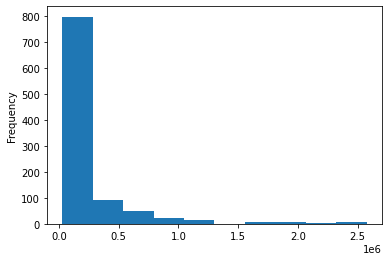

In [ ]:
df_final.session_duration_seconds.plot.hist()

**Gráfico de dispersão**

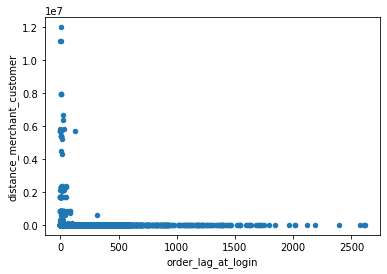

In [ ]:
df_orders.plot(x ='order_lag_at_login', y='distance_merchant_customer', kind='scatter')

In [ ]:
#Podemos notar que a distancia entre o cliente e o restaurante, não afeta na frequencia do pedido ou seja, o frete e o tempo de entrega não afeta os pedidos.

**Gráfico de barras**

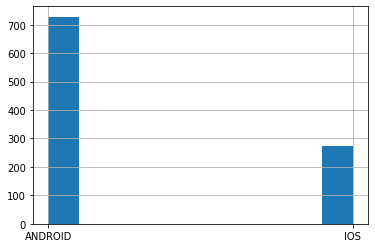

In [ ]:
df_final.platform.hist()

In [ ]:
#Notamos que temos quase 2 vezes mais usuarios da plataforma Android do que IOS.

**Box-plot**

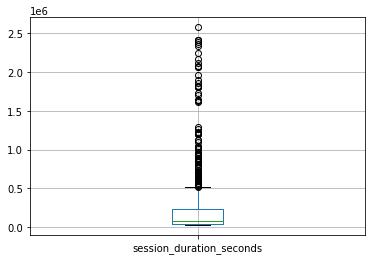

In [ ]:
df_final.boxplot(column = 'session_duration_seconds')

In [ ]:
df_final.session_duration_seconds.describe()
#Podemos identificar diversos outliers, que podem ser usuários que esquecem os aplicativos ligados e fazem outras atividades.

count      1000.00
mean     227138.10
std      378890.26
min       28557.00
25%       44977.25
50%       77864.50
75%      235720.00
max     2575751.00
Name: session_duration_seconds, dtype: float64